<a href="https://colab.research.google.com/github/gogiri/ml/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state = 17, max_depth=5, min_samples_split=10)
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)
dt_clf.fit(X_train, y_train)

from sklearn.tree import export_text
r = export_text(dt_clf, feature_names= iris_data.feature_names)
print(r)

|--- petal length (cm) <= 2.60
|   |--- class: 0
|--- petal length (cm) >  2.60
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- sepal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  4.95
|   |   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [17]:
dt_clf.feature_importances_

array([0.01229567, 0.        , 0.62161634, 0.36608799])

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names,
                feature_names = iris_data.feature_names, impurity = True, filled = True)

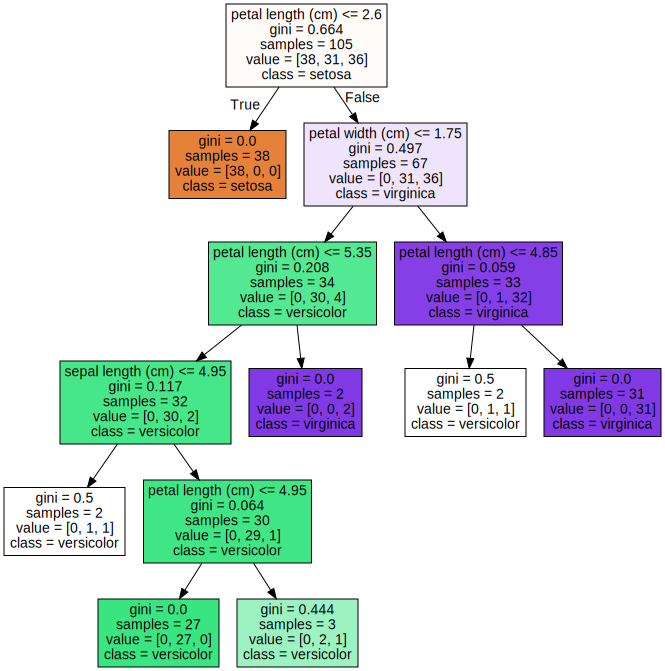

In [16]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

[Text(0.4444444444444444, 0.9166666666666666, 'x[2] <= 2.6\ngini = 0.664\nsamples = 105\nvalue = [38, 31, 36]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'x[3] <= 1.75\ngini = 0.497\nsamples = 67\nvalue = [0, 31, 36]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[2] <= 5.35\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[0] <= 4.95\ngini = 0.117\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3333333333333333, 0.25, 'x[2] <= 4.95\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.7777777777777778,

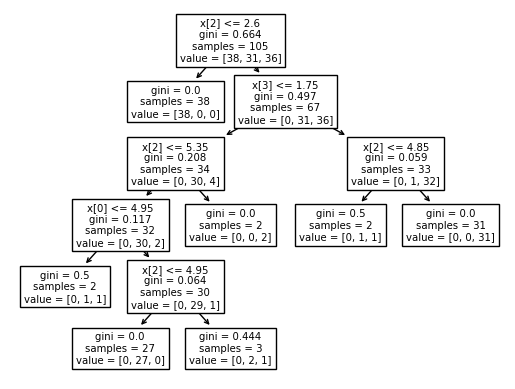

In [22]:
from sklearn.tree import plot_tree
plot_tree(dt_clf)